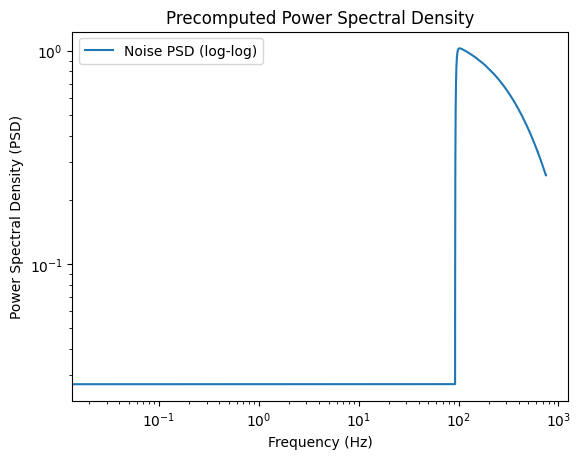

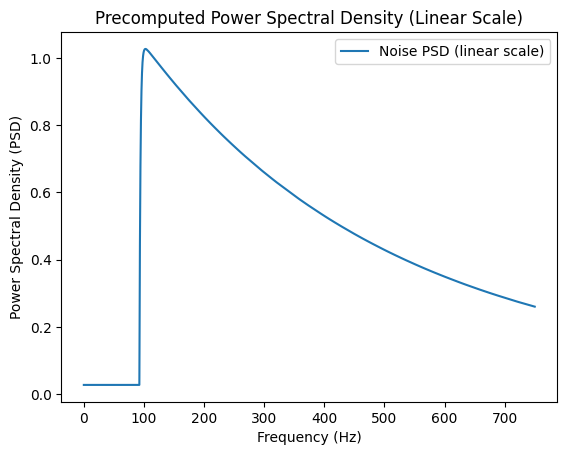

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from OptimumFilter import *

# Load templates, traces, and precomputed PSD
ka_template = np.load('Ka_template.npy')
kb_template = np.load('Kb_template.npy')
ka_data_1 = np.load('Ka_traces_1.npz')
ka_data_2 = np.load('Ka_traces_2.npz')
kb_data = np.load('Kb_traces.npz')

noise_psd = np.load('template_K_alpha_tight.npy')  # Load precomputed PSD

# Extract traces from npz file (assuming it contains an array named 'traces')
traces_a = np.concatenate((ka_data_1['data'], ka_data_1['data']), axis=0)
traces_b = kb_data['data']

sampling_frequency = 3_906_250

# flag, modify
if noise_psd.shape[0] != traces_a.shape[-1]:
    raise ValueError("Noise PSD shape mismatch with trace length")

# Initialize and use OptimumFilter with Ka template
opt_filter_ka = OptimumFilter(template=ka_template, noise_psd=noise_psd, sampling_frequency=sampling_frequency)
amplitude_ka, chi_square_ka = opt_filter_ka.fit(traces_a)


